In [ ]:
using Plots
using LaTeXStrings

# A-3

_Eine ebene Wand besteht aus zwei Materialien, A und B. In der Schicht aus Material A wird homogen Wärme (1.500.000 W/m³) generiert, die Wärmeleitfähigkeit beträgt 75 W/mK und die Schichtdicke beträgt 50 mm.
Die zweite Materialschicht B hat eine Wärmeleitfähigkeit von 75 W/mK und eine Schichtdicke von 20 mm. Die Innenseite von Material A ist adiabat isoliert, während die Außenseite durch Wasser mit 30 °C bei einem Wärmeübergangskoeffizienten von 1000 W/m²K gekühlt wird._

<div style="text-align:center"><img src="./img/Abbildung_Aufgabe3.png" width=550Px></div>

_a) Stellen Sie die Temperaturverteilung in der Wand unter stationären Bedingungen dar._

1. Zuweisen der benötigten Variablen:

In [2]:
x = 0                 # x-Koordinate
L_A = 0.050           # Schichtdicke A, m
λ_A = 75              # Wärmeleitfähigkeit A, W/m·K
A_s0 = 1              # Oberfläche m^2; unit area shown
A_s1 = A_s0           # Oberfläche m^2
q_dot = 1.5e6         # volumetrische Wärmegeneration, W/m^3, Notation 1,5* 10^6

# Randbedingung CS0: Adiabate Oberfläche
qx_CS0 = 0            # Wärmestromdichte, W/m^2

# Randbedingung CS1: Konvektion
T_inf1 = 30           # fluid Temperatur, °C
α1 = 1000             # Wärmeübergangskoeffizient, W/m^2.K

L_B = 0.020           # Schichtdicke, m
λ_B =150 ;            # Wärmeleitfähigkeit B W/m.K

Die Oberflächentemperatur $T_2$ kann aus der Energiebilanz um ein Kontrollvolumen der Schicht B ermittelt werden. Die Wärmestromdichte in das Material hinein an der Stelle `x = L_A` muss dem durch Konvektion an der Stelle `x = L_A + L_B` abgegebenen Wärmestrom entsprechen.
Da die Randbedingung bei $x=0$ adiabat ist, wird die gesamte in A generierte Wärme an der Grenzfläche zu B übertragen

$$\dot{q}^{''}_{conv} = \alpha \cdot (T_2-T_{inf1}) = \dot{q}^{```} \cdot L_A$$

Umformen ergibt

In [3]:
q_conv = q_dot * L_A

75000.0

Für $T_2$ berechnen wir die Temperatur wie folgt:

In [4]:
T_2 = T_inf1 + q_conv/α1

105.0

Die Temperatur an der Stelle ``x = L_A`` kann aus dem Wärmewiderstandsschaubild berechnet werden.
<div style="text-align:center"><img src="./img/Abbildung_Aufgabe32.png" width=400Px></div>

In [10]:
T_1 = T_inf1 + (L_B/λ_B + 1/α1) * q_conv

115.0

Die Temperatur $T_0$ an der Stelle ``x = 0`` ist entsprechend

In [11]:
T_0 = q_conv * L_A/(2 * λ_A) + T_1

140.0

Die Temperaturen können also allgemein als Funktion der Ortskoordinate x dargestellt werden. Die Temperatür in dem Bereich zwischen x = 0 und x = L_A ist

$$T_{v1} = T_0 - \dot{q}^{```}\cdot x \cdot\frac{x}{2 \cdot \lambda_A} $$

_(Die hier verwendete Syntax ist erstmal nicht wichtig. Wer sich informieren will wie die "plot" Funktion funktioniert, findet unter https://docs.juliaplots.org/latest/ weitere Informationen)_

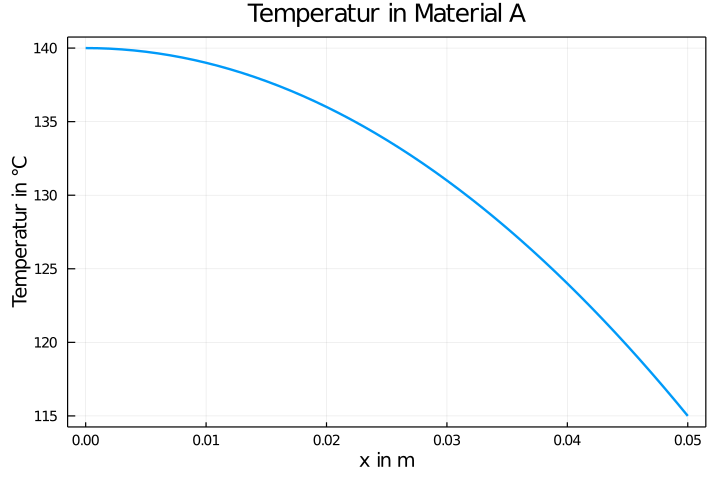

In [45]:
xA = collect(0:0.001:0.05)
T_A = T_0 .- q_dot .* xA .* xA./(2 .* λ_A)

plt1 = plot(xA, T_A, title = "Temperatur in Material A",
    xlabel="x in m", ylabel="Temperatur in °C", label ="",
    linewidth = 2,framestyle = :box, dpi = 120)

## ZA-3.1: 
_Implementieren Sie die Berechnung und das Diagramm für Material B._


Stellen Sie zunächst eine Gleichung auf, die die Temperatur in Material B in Abhängigkeit der Ortskoordinate x wieder gibt.

Ergänzen Sie dafür folgenden Codeausschnitt und kommentieren Sie die Zeilen für die Darstellung ein und führen Sie den Code aus.

``` julia
xB = collect(0.05:0.001:0.07)
T_B= # Lösung eintragen

plt2 = plot(xB, T_B, xlabel="x in m", ylabel="Temperatur in °C", label = "",
            title = "Temperatur in Material B", linewidth = 2, framestyle = :box,
            dpi = 120)
```

In [41]:
# Lösung eintragen


Abschließend führen wir die beiden Diagramme zusammen, um einen nahtlosen Temperaturverlauf darzustellen.

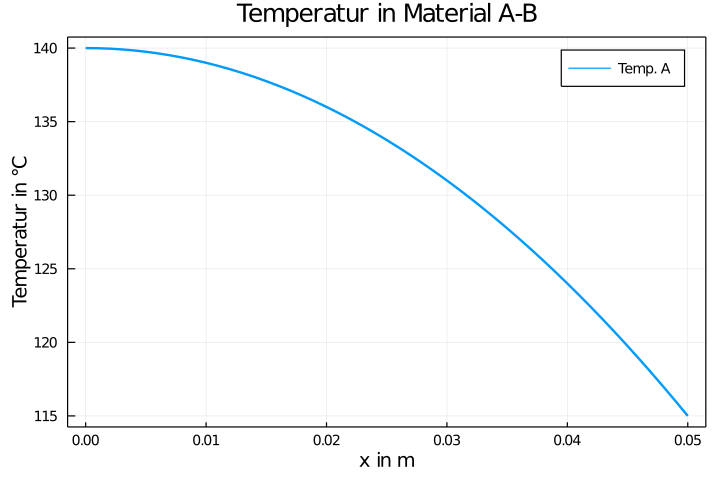

In [44]:
plt1 = plot(xA, T_A, title = "Temperatur in Material A-B",
    xlabel="x in m", ylabel="Temperatur in °C", label ="Temp. A",
    linewidth = 2,framestyle = :box, dpi = 120)
# plt = plot!(plt1,xB, T_B, title="Temperatur in Material A-B", linewidth=2, label="Temp. B")